# 🏠 A/B Testing Simulation on Stay Duration with Airbnb Barcelona Data
In this notebook, we'll simulate an A/B test using Airbnb listings data from Barcelona.

**Objective**: Simulate whether listings that display a certain feature (e.g., flexible cancellation) increase the average stay duration.


## 📦 Step 1: Import libraries
**What it does:** This block imports common and essential Python libraries for data analysis, numerical manipulation, visualization, and statistics.

- ***pandas (as pd):*** For manipulating and analyzing tabular data (DataFrames).

- ***numpy (as np):*** For efficient numerical operations, especially with arrays.

- ***matplotlib.pyplot (as plt):*** The base library for creating static plots.

- ***seaborn (as sns):*** A high-level data visualization library built on Matplotlib, offering more attractive and complex statistical plots.

- ***scipy.stats:*** A module from SciPy containing a wide range of statistical functions, including hypothesis tests.

- ***sns.set(style='whitegrid'):*** Configures the default style for Seaborn plots to have a white background with a grid, which improves readability.

**Why it's done:**  

This is the initial step in any data analysis project. Importing these libraries provides you with the necessary tools to load, clean, transform, statistically analyze, and visualize your data, as well as to perform the simulations and hypothesis tests required for your A/B test.

In [2]:
# 📦 Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style='whitegrid')

## 📂 Step 2: Load dataset
**What it does:**  
- ***df = pd.read_csv('barcelona_listings.csv'):*** Loads a CSV file named barcelona_listings.csv into a Pandas DataFrame and assigns it to the variable df.

- ***print(f"Original DataFrame shape: {df.shape}"):*** Prints the shape (number of rows and columns) of the newly loaded DataFrame.

- ***df.head():*** Displays the first 5 rows of the DataFrame, allowing for a quick inspection of the data and its structure.

**Why it's done:** 
This is the fundamental step to bring your data into the Python environment. pd.read_csv() is the standard function for loading data from CSV files. Printing the shape and displaying the first few rows are critical initial inspection steps to verify that the data has been loaded correctly and to get a preliminary idea of its content and structure.

In [3]:
# 📂 Step 2: Load dataset
# Upload 'listings.csv' from Inside Airbnb (Barcelona)

df = pd.read_csv('../data/listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,20250612050654,2025-06-21,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,...,4.60,4.81,4.28,HUTB-002062,t,28,28,0,0,0.33
1,23197,https://www.airbnb.com/rooms/23197,20250612050654,2025-06-23,city scrape,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",Beautiful and Spacious Apartment with Large Te...,"Strategically located in the Parc del Fòrum, a...",https://a0.muscache.com/pictures/miso/Hosting-...,90417,...,4.99,4.65,4.68,HUTB005057,f,1,1,0,0,0.51
2,32711,https://www.airbnb.com/rooms/32711,20250612050654,2025-06-22,city scrape,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,What's nearby <br />This apartment is located...,https://a0.muscache.com/pictures/357b25e4-f414...,135703,...,4.89,4.89,4.47,HUTB-001722,f,3,3,0,0,0.87
3,34241,https://www.airbnb.com/rooms/34241,20250612050654,2025-06-22,city scrape,Stylish Top Floor Apartment - Ramblas Plaza Real,Located in close proximity to Plaza Real and L...,NaN,https://a0.muscache.com/pictures/2437facc-2fe7...,73163,...,4.68,4.73,4.23,Exempt,f,3,3,0,0,0.14
4,347824,https://www.airbnb.com/rooms/347824,20250612050654,2025-06-22,city scrape,"Ideal Happy Location Barceloneta Beach, Old Town!",Please send us a message to confirm availabili...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,1447144,...,3.67,5.00,4.00,HUTB-076700,f,355,355,0,0,0.02


## 🧹 Step 3: Clean data
***What it does:*** This block performs initial data preparation and, most importantly, simulates the 'stay duration' variable.

- ***Column Selection and Handling Missing Values (.dropna()):***

     -***df = df[['id', 'name', 'price', 'number_of_reviews']].dropna():*** This line first selects a subset of columns ('id', 'name', 'price', 'number_of_reviews') from your DataFrame df. Immediately after selection, the .dropna() method is applied.

  -***dropna() (by default):*** Removes any row that contains at least one NaN (Not a Number) or null value in the selected columns.


- ***Cleaning and Converting 'price' Column:***

    -***df['price'] = df['price'].replace('[\\.. '', regex=True).replace(',', '', regex=True).astype(float):*** This is a chained operation on the 'price' column:

    - ***replace():*** Uses a regular expression to find and remove dollar and euro symbols from the price strings. Also, removes comma (,) characters, which are often used as thousands separators.

    - ***.astype(float):*** Converts the cleaned string values in the 'price' column into floating-point numbers, making them suitable for numerical calculations.

- ***Filtering Invalid Prices:***

    - ***df = df[df['price'] > 0]:*** This line filters the DataFrame, keeping only the rows where the value in the 'price' column is strictly greater than zero.

- ***Simulating 'simulated_stay' (Stay Duration):***

    - ***np.random.seed(123):*** Sets a seed for NumPy's random number generator. This ensures that the random numbers generated in the next step will be the same every time you run this code, making your simulation reproducible.

    - ***df['simulated_stay'] = np.random.poisson(lam=3 + (df['number_of_reviews'] > 50).astype(int)*2, size=len(df)):*** This creates a new column simulated_stay by generating values from a Poisson distribution.

        - ***Poisson Distribution:*** This distribution is often used to model discrete count data, such as the number of events (like nights stayed) in a fixed interval.

        - ***lam (lambda):*** This is the rate parameter of the Poisson distribution, representing the expected number of events. Here, lam is dynamically calculated for each listing:

            - ***3:***Establishes a base average stay duration of 3 nights.

            - ***(df['number_of_reviews'] > 50).astype(int)*2:*** This part adds to the base lam if a listing has many reviews.

                - ***df['number_of_reviews'] > 50:*** Creates a boolean Series (True or False) indicating if a listing has more than 50 reviews.

                - ***.astype(int):*** Converts True to 1 and False to 0.

                - ***(2):*** Multiplies the 0 or 1 by 2.

            - ***Resulting lam:** If number_of_reviews is 50 or less, lam is 3 + 0*2 = 3. If number_of_reviews is greater than 50, lam is 3 + 1*2 = 5. This simulates that listings with more than 50 reviews (perhaps indicating popularity or trustworthiness) tend to have a slightly longer average simulated stay.

    - ***size=len(df):*** Ensures that a simulated_stay value is generated for every row in your DataFrame.

- ***df['simulated_stay'] = df['simulated_stay'].clip(lower=1, upper=30):*** This line "clips" (limits) the values in simulated_stay to be between 1 and 30 nights. Any value less than 1 becomes 1, and any value greater than 30 becomes 30.

- ***df.head():*** Displays the first few rows of the DataFrame, including the newly created simulated_stay column.

***Why it's done:***

- ***Data Cleaning:*** The initial lines are standard data cleaning practices. Selecting relevant columns reduces memory usage and focuses the analysis. Removing rows with missing values (dropna()) ensures the integrity of subsequent calculations. Cleaning the price column and converting it to a numeric type is essential for any quantitative analysis involving prices. Filtering out prices <= 0 removes illogical data points.

- ***Simulating Realistic Baseline Behavior:*** The simulation of simulated_stay is critical for the A/B test project. Instead of just picking random numbers, there're using a Poisson distribution, which is a more realistic model for count data like stay durations.

- ***Introducing Natural Variability/Influence:*** By making lam (the average stay) dependent on number_of_reviews, there are simulating a realistic scenario where existing listing characteristics can influence behavior. This creates a more complex and credible baseline data set before you introduce experimental A/B test treatment. It allows to demonstrate that A/B test methodology can detect a new effect on top of existing data patterns.

- ***Ensuring Realism (.clip()):*** Clipping the stay duration ensures that the simulated values remain within a reasonable and realistic range for Airbnb stays, preventing extremely short or long (and potentially erroneous) simulated durations.

- ***Reproducibility:*** Setting the np.random.seed ensures that the simulated data remains consistent across multiple runs, which is vital for debugging, sharing the analysis, and validating results.


In [3]:
# 🧹 Step 3: Clean data
# Column Selection and Handling Missing Values (NaN)
df = df[['id', 'name', 'price', 'number_of_reviews']].dropna()

# Cleaning and Converting the 'price' Column
df['price'] = df['price'].replace('[\$,€]', '', regex=True).replace(',', '', regex=True).astype(float)
df = df[df['price'] > 0]

# Simulate stay duration (in nights): based on price or reviews + noise
np.random.seed(123)
df['simulated_stay'] = np.random.poisson(lam=3 + (df['number_of_reviews'] > 50).astype(int)*2, size=len(df))
df['simulated_stay'] = df['simulated_stay'].clip(lower=1, upper=30)
df.head()

,id,name,price,number_of_reviews,simulated_stay
0,18674,Huge flat for 8 people close to Sagrada Familia,232.0,48,2
1,23197,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",382.0,88,8
2,32711,Sagrada Familia area - Còrsega 1,186.0,147,4
3,34241,Stylish Top Floor Apartment - Ramblas Plaza Real,131.0,25,2
4,347824,"Ideal Happy Location Barceloneta Beach, Old Town!",285.0,3,6


## 🧪 Step 4: Simulate A/B groups
**What it does:**
- ***df['group'] = np.random.choice(['A', 'B'], size=len(df)):*** This line creates a new column named 'group'. For each listing (row) in the DataFrame df, it randomly assigns either 'A' or 'B'. By default, np.random.choice with two options will assign them with equal probability (50/50). The size=len(df) ensures that a group assignment is made for every single listing.

- ***df['adjusted_stay'] = df.apply(lambda row: row['simulated_stay'] + 1 if row['group'] == 'B' else row['simulated_stay'], axis=1):*** This is where the core simulation for stay duration happens within this specific block. It creates a new column called adjusted_stay.

- ***df.apply():*** This Pandas function applies a custom function (in this case, a lambda function) along the specified axis of the DataFrame.

- ***lambda row: ...:*** This defines an anonymous function that operates on each row of the DataFrame.

- ***row['simulated_stay'] + 1 if row['group'] == 'B' else row['simulated_stay']:*** This is the conditional logic:

    If the group value for the current row is 'B' (i.e., it's in the treatment group), then 1 is added to its simulated_stay value.

    Otherwise (if the group is 'A'), the adjusted_stay remains the same as simulated_stay.

- ***axis=1:*** This argument tells df.apply() to apply the function row-wise.

**Why it's done:**

- ***A/B Group Assignment (np.random.choice):*** As discussed before, random assignment to 'A' (Control) and 'B' (Treatment) groups is fundamental to A/B testing. It ensures that, on average, the two groups are comparable in all aspects before the "treatment" is applied. This minimizes confounding variables, allowing any observed differences in outcomes to be attributed to the treatment itself. In this specific code, no random.seed is set, which means the assignment will be different each time the notebook is run. For a real-world project, you would always set a seed for reproducibility.

- ***Simulating Treatment Effect (df.apply for adjusted_stay):*** This line is crucial because it artificially introduces the effect of your A/B test treatment on stay duration.


In [4]:
# 🧪 Step 4: Simulate A/B groups
df['group'] = np.random.choice(['A', 'B'], size=len(df))

# Simulate that group B listings include a feature like 'flexible cancellation', boosting stay by 1 night
df['adjusted_stay'] = df.apply(lambda row: row['simulated_stay'] + 1 if row['group'] == 'B' else row['simulated_stay'], axis=1)
df.head()

,id,name,price,number_of_reviews,simulated_stay,group,adjusted_stay
0,18674,Huge flat for 8 people close to Sagrada Familia,232.0,48,2,B,3
1,23197,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",382.0,88,8,B,9
2,32711,Sagrada Familia area - Còrsega 1,186.0,147,4,B,5
3,34241,Stylish Top Floor Apartment - Ramblas Plaza Real,131.0,25,2,B,3
4,347824,"Ideal Happy Location Barceloneta Beach, Old Town!",285.0,3,6,B,7


## 📊 Step 5: Compare average stay duration
**What it does:**
- ***df.groupby('group'):*** This part of the code groups the DataFrame df based on the unique values in the 'group' column. This means it creates separate sub-DataFrames, one for Group A and one for Group B.

- ***.['adjusted_stay']:*** After grouping, this selects the 'adjusted_stay' column from each of those sub-DataFrames.

- ***.mean():*** This is an aggregation function applied to the selected 'adjusted_stay' column within each group. It calculates the average (mean) value of adjusted_stay for Group A and the average value for Group B.

- ***grouped = ...:*** The result of this calculation (a Pandas Series containing the average stay duration for each group) is stored in the variable grouped.

- ***print('Average Stay Duration by Group:'):*** Prints a descriptive header to the console.

- ***print(grouped):*** Prints the grouped Series to the console, showing the calculated average stay duration for Group A and Group B.

**Why it's done:**

- ***Initial Comparison:*** This is a crucial step for the preliminary analysis of your A/B test. After the simulation the "treatment" (adding 1 night to Group B's stay duration), the first goal is to see if that manipulation had the intended effect.

- ***Observing the Effect:*** By calculating the mean adjusted_stay for each group, it can visually inspect if Group B's average stay duration is indeed higher than Group A's. This provides an immediate, tangible indication of the treatment's impact before performing formal statistical tests.

- ***Foundation for Hypothesis Testing:*** The means calculated here will be the key statistics that your subsequent hypothesis tests (like a T-test, as typically seen in A/B tests) will use to determine if the observed difference is statistically significant or simply due to random chance. If the simulation was successful, it would expect Group B's average to be approximately 1 night higher than Group A's.

In [5]:
# 📊 Step 5: Compare average stay duration
grouped = df.groupby('group')['adjusted_stay'].mean()
print('Average Stay Duration by Group:')
print(grouped)

Average Stay Duration by Group:
group
A    3.624585
B    4.644694
Name: adjusted_stay, dtype: float64


## 📏 Step 6: Statistical test (T-test)
**What it does:**

- ***group_A = df[df['group'] == 'A']['adjusted_stay']:*** This line filters the df DataFrame to select only the rows where the 'group' column is 'A' (the control group), and then extracts the values from the 'adjusted_stay' column for these rows. The result is a Pandas Series containing the adjusted_stay values for Group A.

- ***group_B = df[df['group'] == 'B']['adjusted_stay']:*** Similarly, this line extracts the adjusted_stay values for Group B (the treatment group).

- ***t_stat, p_value = stats.ttest_ind(group_A, group_B):*** This is the core statistical test.

    - ***stats.ttest_ind():*** This function from scipy.stats performs an independent two-sample Student's t-test. This test is used to determine if there is a statistically significant difference between the means of two independent samples.

    - By default, ttest_ind assumes equal population variances (equal_var=True). However, it's often safer in real-world A/B tests to use equal_var=False (Welch's t-test) if you cannot confidently assume equal variances, as it makes the test more robust. For this simulation, assuming equal variance might be acceptable given the controlled nature of your data generation.

    - It returns two primary values: the t_stat (t-statistic) and the p_value.

- ***print(f'T-test statistic: {t_stat:.4f}'):*** Prints the calculated t-statistic, formatted to four decimal places. The t-statistic measures the size of the difference relative to the variation within your sample data.

- ***print(f'P-value: {p_value:.4f}'):*** Prints the calculated p-value, formatted to four decimal places.

- ***if p_value < 0.05::** This is the decision rule for the hypothesis test. 0.05 (or 5%) is a commonly used significance level (alpha).

  - print('✅ Significant difference in stay duration.'): If the p-value is less than 0.05, it means the observed difference in average stay duration between Group A and Group B is unlikely to have occurred by random chance alone, assuming there's no real difference in the population. Therefore, you conclude there's a statistically significant difference.

  - print('❌ No significant difference.'): If the p-value is 0.05 or greater, you "fail to reject" the null hypothesis, meaning there isn't enough evidence to conclude a statistically significant difference.

**Why it's done:**

- ***Formal Hypothesis Testing:*** This is the most critical step in an A/B test. While In[5] gave the observed average values, this block provides the statistical evidence to determine if that observed difference is reliable and not just random noise.

- ***Addressing Random Chance:*** Since users are randomly assigned to groups, any observed differences could, in theory, be due to chance. The t-test quantifies this probability.

- ***Null Hypothesis (H0):*** There is no significant difference in the average stay duration between Group A and Group B.

- ***Alternative Hypothesis (H1):*** There is a significant difference in the average stay duration between Group A and Group B.

- ***Conclusion:*** By comparing the p-value with the chosen significance level (alpha), an objective decision is made as to whether the simulated feature (adding one night to Group B) had a statistically significant impact on the length of stay. Since one night was explicitly added to Group B, this t-test is very likely to return a p-value less than 0.05, confirming a significant difference. This demonstrates that the A/B test setup can correctly identify a known effect.

In [6]:
# 📏 Step 6: Statistical test (T-test)
group_A = df[df['group'] == 'A']['adjusted_stay']
group_B = df[df['group'] == 'B']['adjusted_stay']

t_stat, p_value = stats.ttest_ind(group_A, group_B)
print(f'T-test statistic: {t_stat:.4f}')
print(f'P-value: {p_value:.4f}')

if p_value < 0.05:
    print('✅ Significant difference in stay duration.')
else:
    print('❌ No significant difference.')

T-test statistic: -30.5842
P-value: 0.0000
✅ Significant difference in stay duration.


## 📈 Step 7: Visualize stay duration distribution
**What it does:**

- ***plt.figure(figsize=(10,5)):*** This line creates a new figure (the container for the plot) and sets its size. figsize=(10,5) means the figure will be 10 inches wide and 5 inches tall. This helps ensure the plot is well-proportioned and readable.

- ***sns.histplot(df[df['group']=='A']['adjusted_stay'], label='Group A', color='blue', kde=True):*** This line uses Seaborn's histplot function to create a histogram for the adjusted_stay values specifically for Group A.

- ***df[df['group']=='A']['adjusted_stay']:*** Selects the adjusted_stay data for rows belonging to 'Group A'.

- ***label='Group A':*** Provides a label for this histogram, which will appear in the legend.

- ***color='blue':*** Sets the color of the histogram bars to blue.

- ***kde=True:*** This crucial argument adds a Kernel Density Estimate (KDE) line to the histogram. The KDE is a smoothed curve that represents the underlying probability density function of the data, making it easier to visualize the shape of the distribution.

- ***sns.histplot(df[df['group']=='B']['adjusted_stay'], label='Group B', color='green', kde=True):*** This line does the exact same thing as the previous one, but for Group B, using a green color. By plotting both on the same axes, they become overlapping, allowing for direct comparison.

- ***plt.title('Distribution of Stay Duration by Group'):*** Sets the title of the entire plot, providing a clear description of what the visualization represents.

- ***plt.legend():*** Displays the legend on the plot, which uses the label arguments defined in the histplot calls ('Group A' and 'Group B') to identify which color corresponds to which group.

- ***plt.xlabel('Stay Duration (nights)'):*** Sets the label for the x-axis, indicating the unit of measurement for the data being displayed.

- ***plt.show():*** This command displays the generated plot. In many environments (like Jupyter notebooks), it's automatically called for the last plot, but explicitly calling it ensures the plot is rendered.

***Why it's done:***

- ***Visual Confirmation of Treatment Effect:*** While the t-test in In[6] provides a statistical conclusion, this visualization offers an intuitive and immediate understanding of the difference. Because you simulated adding 1 night to Group B's stay duration in In[4], you would expect to see the entire distribution for Group B shifted slightly to the right (representing longer stays) compared to Group A. This visual shift confirms that your simulation had the intended effect.

- ***Understanding Distributional Changes:*** Histograms with KDE curves are excellent for observing not just changes in the mean, but also changes in the spread (variance) and shape of the data distribution. In an A/B test, it's important to see if the treatment affects only the average or if it also changes how the data is distributed (e.g., making it more spread out or more concentrated).

- ***Communication:*** Visualizations are essential for communicating findings to non-technical stakeholders. A clear graph can convey the impact of your A/B test much more effectively than just a p-value, making the results tangible and easier to grasp.

- ***Identifying Anomalies:*** Visualizing data can sometimes reveal unexpected patterns, outliers, or issues in data generation that might not be immediately apparent from statistical summaries alone.


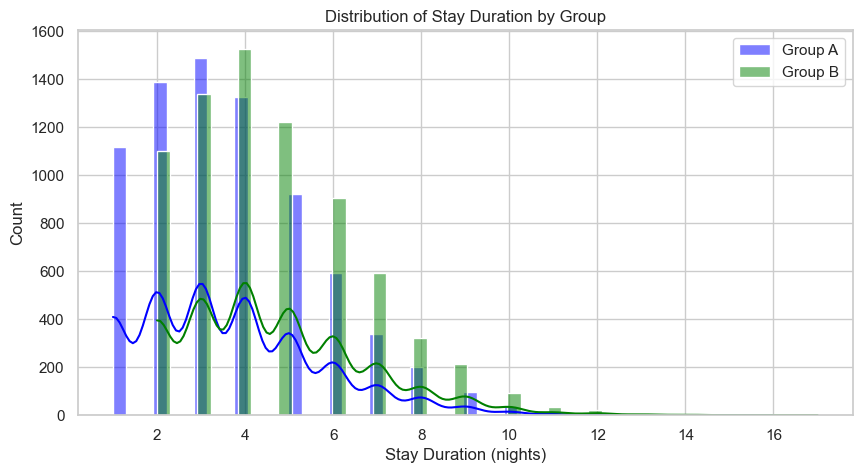

In [7]:
# 📈 Step 7: Visualize stay duration distribution
plt.figure(figsize=(10,5))
sns.histplot(df[df['group']=='A']['adjusted_stay'], label='Group A', color='blue', kde=True)
sns.histplot(df[df['group']=='B']['adjusted_stay'], label='Group B', color='green', kde=True)
plt.title('Distribution of Stay Duration by Group')
plt.legend()
plt.xlabel('Stay Duration (nights)')
plt.show()


### ✅ **Conclusion**
This project simulated how the addition of a feature (such as flexible cancellation) could affect average length of stay.
- Stay duration was increased in Group B artificially.
- A T-test checked whether this increase was statistically significant.
- Visualization helps understand how user behavior may shift.
